# Searching For Correlation between Air Polutions and Mortality

## Air Polutions

### Importing necessarily modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

### Importing Data, previously downloaded from: https://ec.europa.eu/eurostat

In [2]:
# DataFrame from AirPolution CSV
ap_df = pd.read_csv("/Users/patrykdabkowski/Desktop/LifeExpentancy/env_ac_ainah_r2/env_ac_ainah_r2_1_Data.csv", delimiter=",")
ap_df = ap_df[['TIME', 'GEO', 'AIRPOL', 'Value']]
ap_df

,TIME,GEO,AIRPOL,Value
0,2010,European Union - 27 countries (from 2020),Carbon dioxide,2 809 855 835
1,2010,European Union - 27 countries (from 2020),Carbon dioxide,101 646 467
2,2010,European Union - 27 countries (from 2020),Carbon dioxide,30 133 743
3,2010,European Union - 27 countries (from 2020),Carbon dioxide,818 010 355
4,2010,European Union - 27 countries (from 2020),Carbon dioxide,1 127 012 607
...,...,...,...,...
23095,2019,Turkey,Nitrous oxide,:
23096,2019,Turkey,Nitrous oxide,:
23097,2019,Turkey,Nitrous oxide,:
23098,2019,Turkey,Nitrous oxide,:


### Removing data for all EU 

In [3]:
ap_df.drop([x for x in range(133)], inplace = True)
dropindex = ap_df[ ap_df['GEO'] == 'European Union - 28 countries (2013-2020)'].index
ap_df.drop(dropindex, inplace = True)
dropindex = ap_df[ ap_df['GEO'] == 'European Union - 27 countries (from 2020)'].index
ap_df.drop(dropindex, inplace = True)
ap_df['GEO'].unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Serbia', 'Turkey'], dtype=object)

### Summing all values for specific data for country in time and polution kind

In [4]:
df = ap_df[['GEO', 'TIME', 'AIRPOL', 'Value']] 
df

,GEO,TIME,AIRPOL,Value
133,Belgium,2010,Carbon dioxide,2 316 656
134,Belgium,2010,Carbon dioxide,662 770
135,Belgium,2010,Carbon dioxide,35 630 974
136,Belgium,2010,Carbon dioxide,21 413 145
137,Belgium,2010,Carbon dioxide,1 118 837
...,...,...,...,...
23095,Turkey,2019,Nitrous oxide,:
23096,Turkey,2019,Nitrous oxide,:
23097,Turkey,2019,Nitrous oxide,:
23098,Turkey,2019,Nitrous oxide,:


### Because of Excel numerical notation we have to split every single value in 'Value' column and submit it again in one value than append to new values list

In [5]:
values = list()
for value in df['Value']:
    value = value.split(sep=" ")
    value = ''.join(value)
    values.append(value)

### Putting new values list in DataFrame and removing rows which missing data about airpolutions tonnage

In [6]:
df['Value'] = values
df.reset_index(inplace = True, drop = True)
dropindex = df[df['Value'] == ':'].index
df.drop(dropindex, inplace = True)
df.reset_index(inplace = True, drop = True)
df

,GEO,TIME,AIRPOL,Value
0,Belgium,2010,Carbon dioxide,2316656
1,Belgium,2010,Carbon dioxide,662770
2,Belgium,2010,Carbon dioxide,35630974
3,Belgium,2010,Carbon dioxide,21413145
4,Belgium,2010,Carbon dioxide,1118837
...,...,...,...,...
21246,United Kingdom,2019,Nitrous oxide,2055.84
21247,United Kingdom,2019,Nitrous oxide,9.81
21248,United Kingdom,2019,Nitrous oxide,13.33
21249,United Kingdom,2019,Nitrous oxide,1.03


### Converting our values to nummeric type

In [7]:
df['Value'] = pd.to_numeric(df['Value'])
df

,GEO,TIME,AIRPOL,Value
0,Belgium,2010,Carbon dioxide,2316656.00
1,Belgium,2010,Carbon dioxide,662770.00
2,Belgium,2010,Carbon dioxide,35630974.00
3,Belgium,2010,Carbon dioxide,21413145.00
4,Belgium,2010,Carbon dioxide,1118837.00
...,...,...,...,...
21246,United Kingdom,2019,Nitrous oxide,2055.84
21247,United Kingdom,2019,Nitrous oxide,9.81
21248,United Kingdom,2019,Nitrous oxide,13.33
21249,United Kingdom,2019,Nitrous oxide,1.03


pd.to_numeric(df['Value'], downcast='float')
df

### Removing duplicated data

In [8]:
df = df.drop_duplicates(['GEO', 'TIME', 'AIRPOL', 'Value'])
df.reset_index(inplace = True, drop = True)

### Using 'for' loop to collect and sum information for one year for one airpolution

In [9]:
df_new = pd.DataFrame()
for geo in df['GEO'].unique():
    for time in df['TIME'].unique():
        for airpol in df['AIRPOL'].unique():
            value = df['Value'].loc[(df['GEO'] == geo) & (df['TIME'] == time) & (df['AIRPOL'] == airpol)].sum()
            new_row = {'GEO': geo, 'TIME': str(int(time)), 'AIRPOL': airpol, 'Value': value}
            df_new = df_new.append(new_row, ignore_index=True)
df = df_new
df

,GEO,TIME,AIRPOL,Value
0,Belgium,2010,Carbon dioxide,8.876710e+07
1,Belgium,2010,Methane,6.787942e+05
2,Belgium,2010,Nitrous oxide,5.065512e+04
3,Belgium,2011,Carbon dioxide,1.650960e+08
4,Belgium,2011,Methane,6.640458e+05
...,...,...,...,...
985,Turkey,2018,Methane,4.480157e+06
986,Turkey,2018,Nitrous oxide,2.584204e+05
987,Turkey,2019,Carbon dioxide,0.000000e+00
988,Turkey,2019,Methane,0.000000e+00


### Pre-analysis, plots of changes air polution in time for coutries

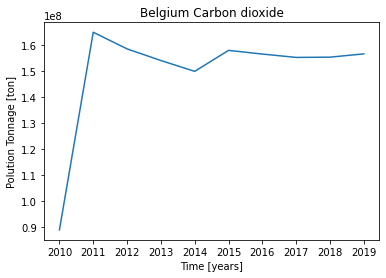

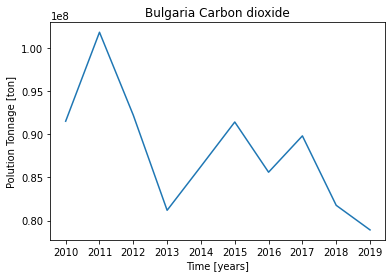

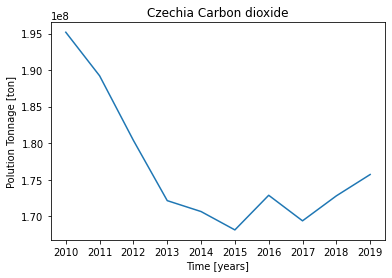

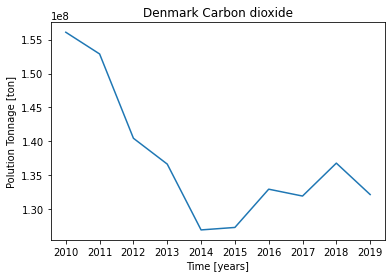

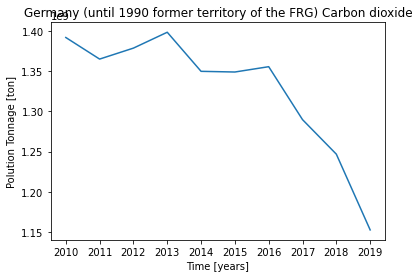

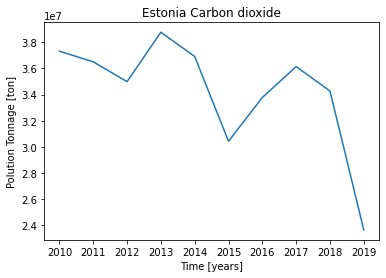

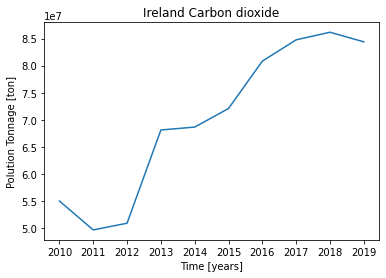

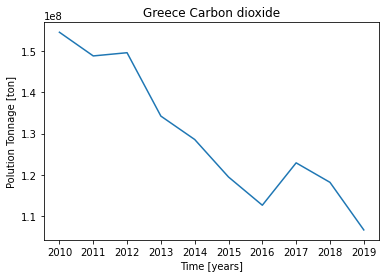

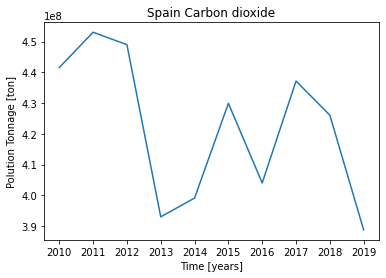

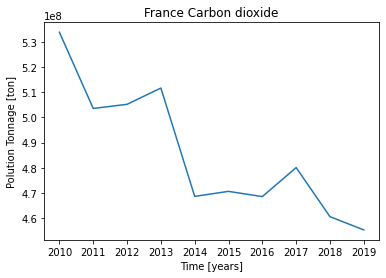

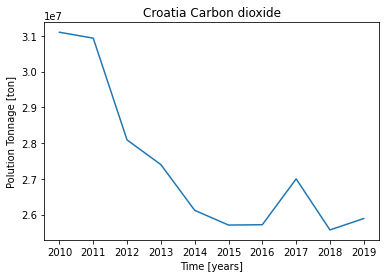

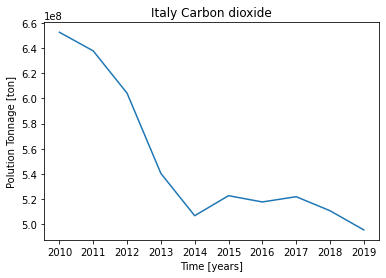

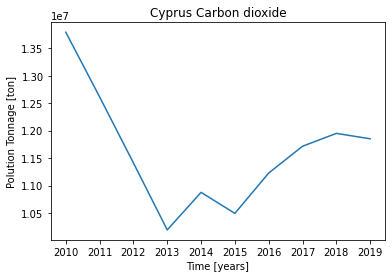

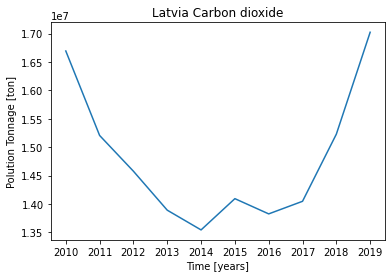

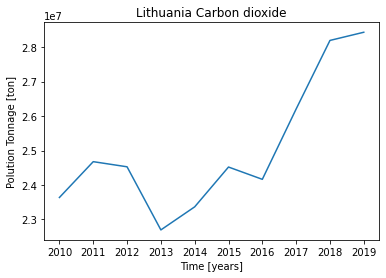

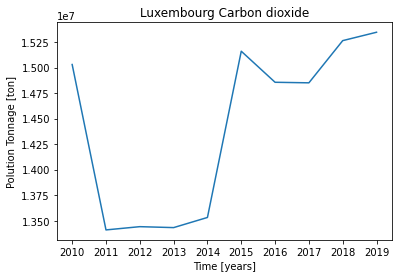

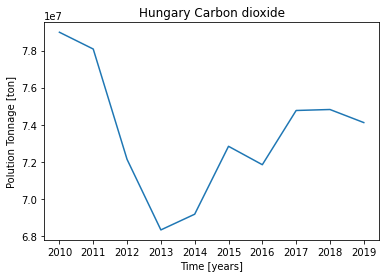

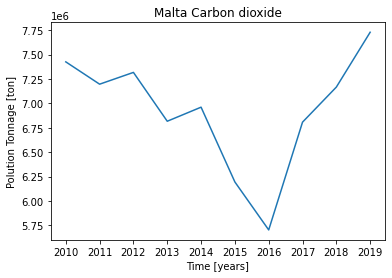

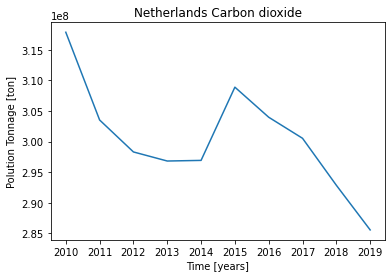

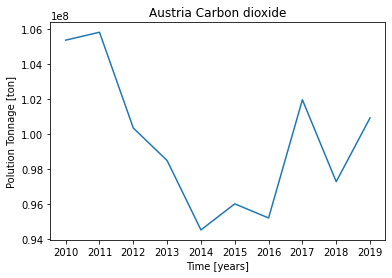

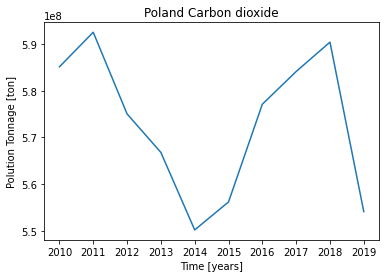

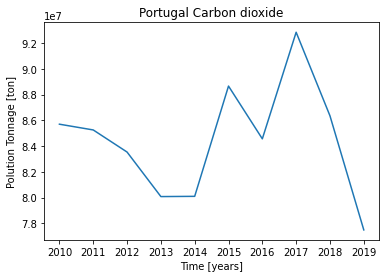

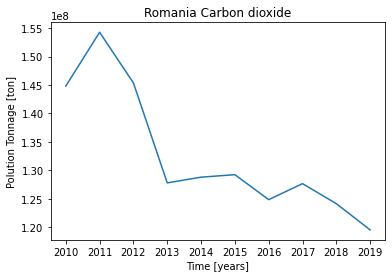

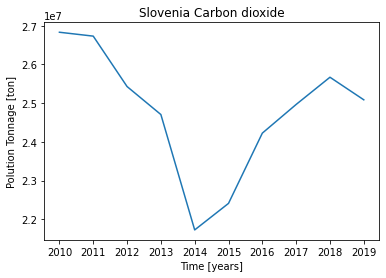

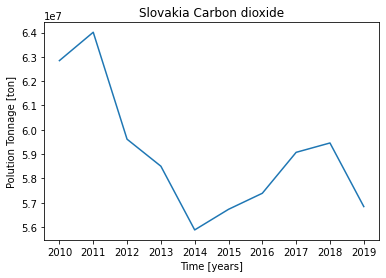

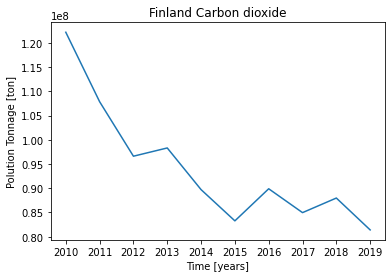

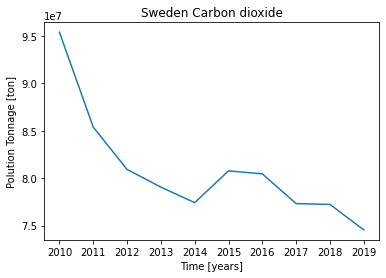

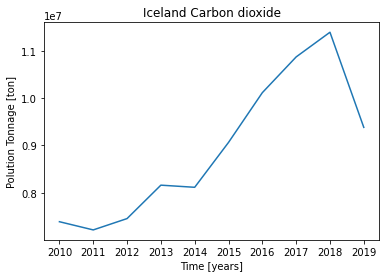

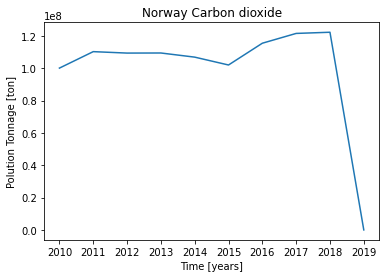

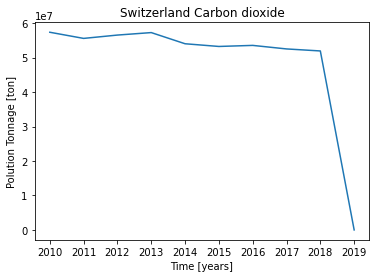

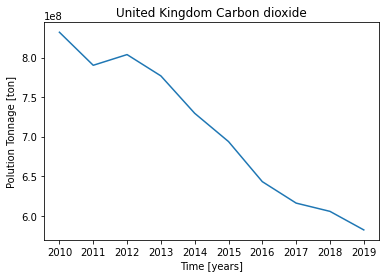

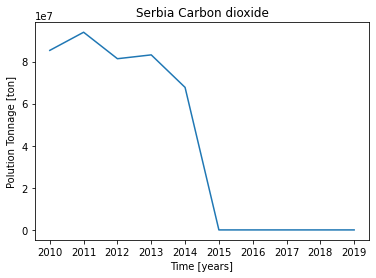

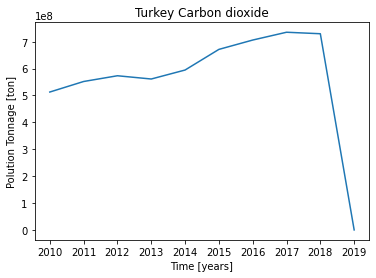

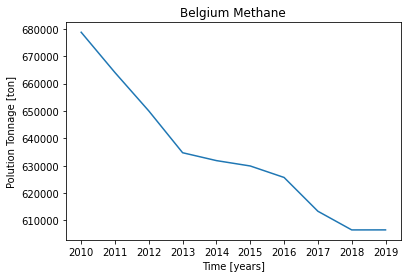

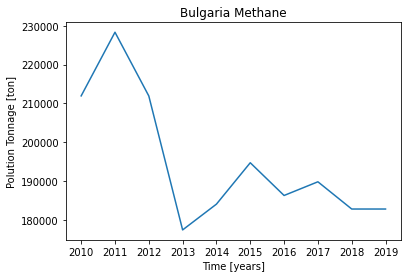

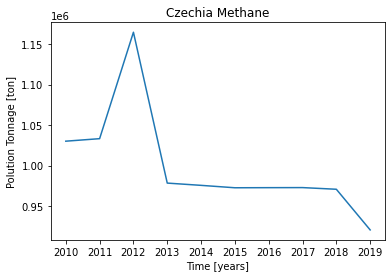

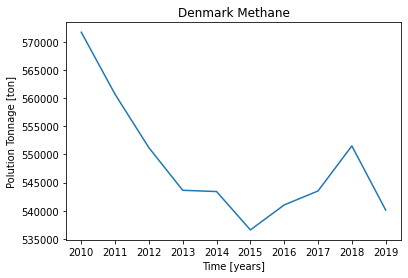

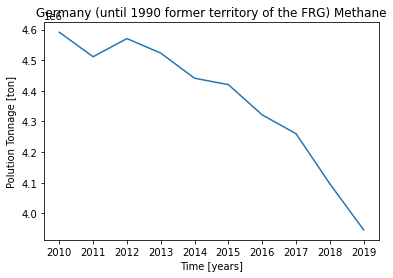

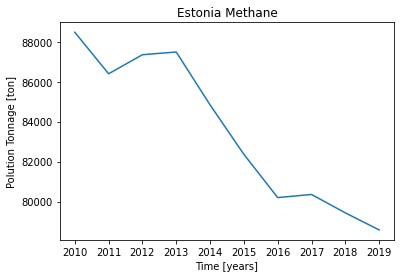

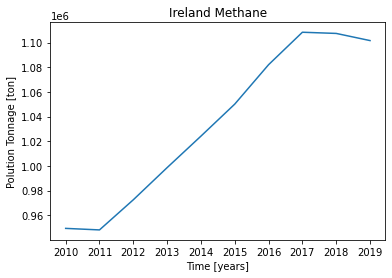

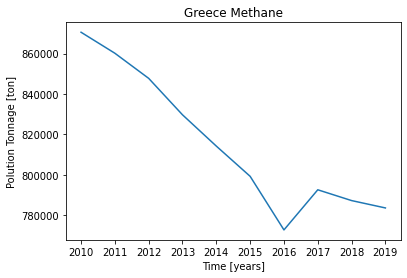

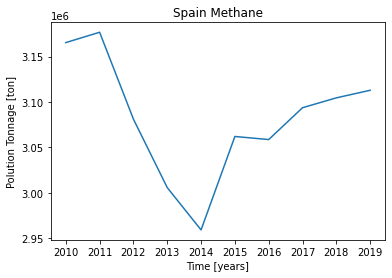

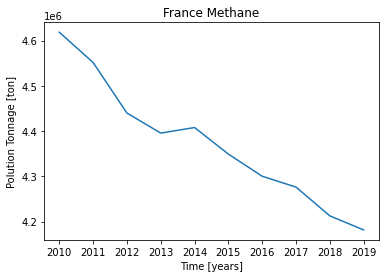

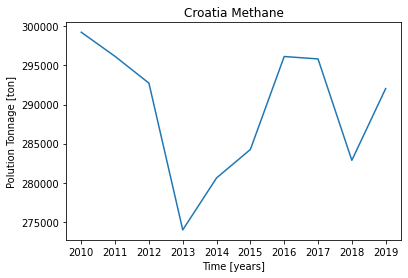

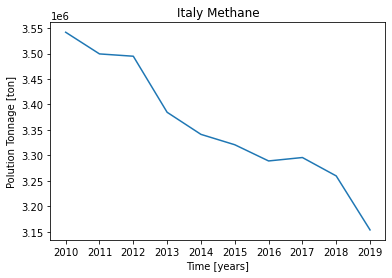

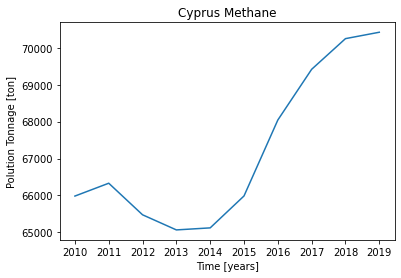

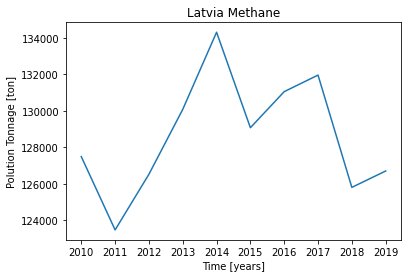

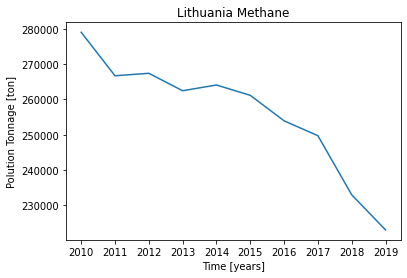

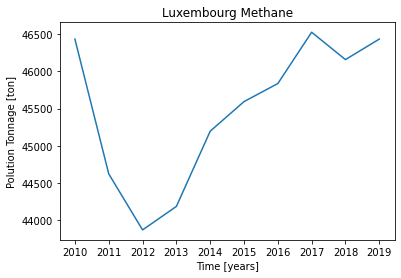

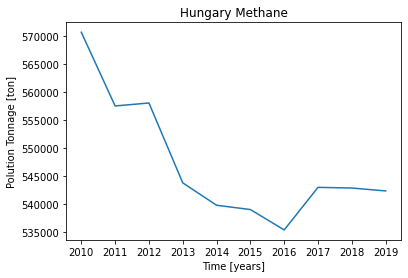

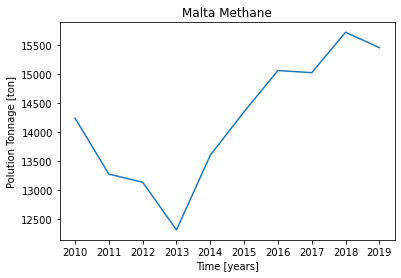

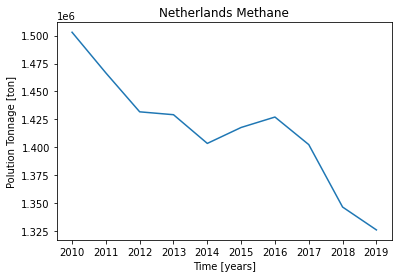

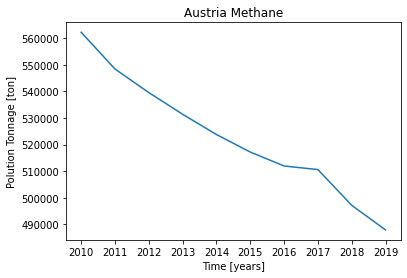

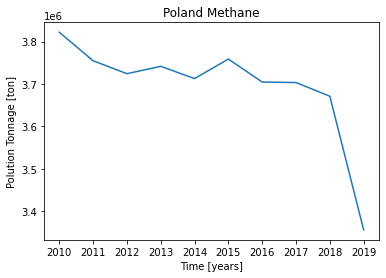

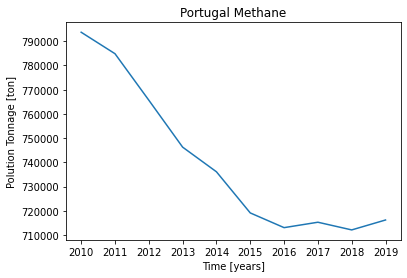

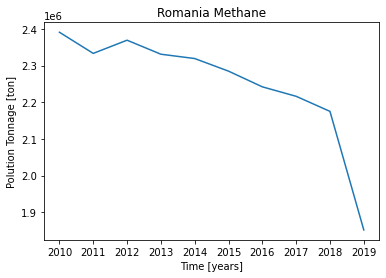

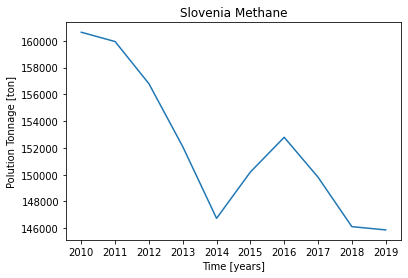

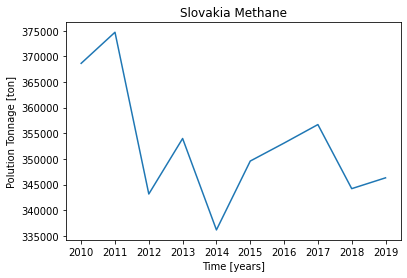

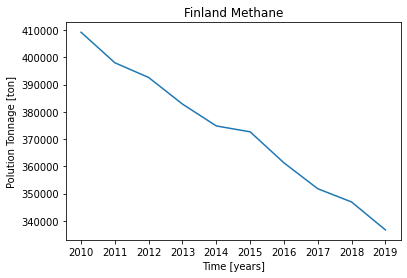

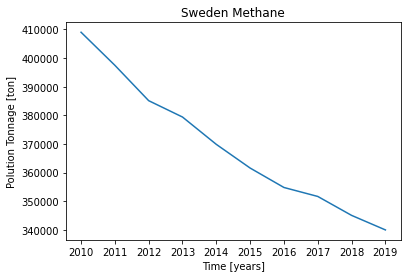

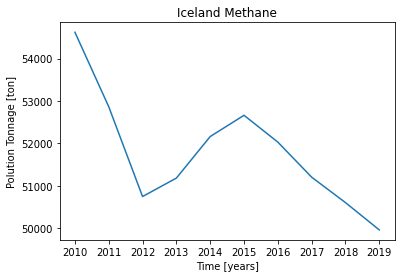

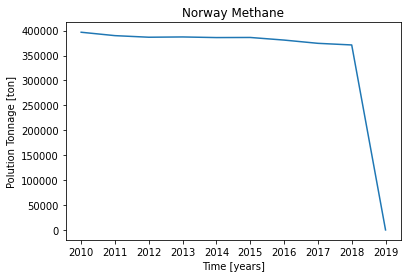

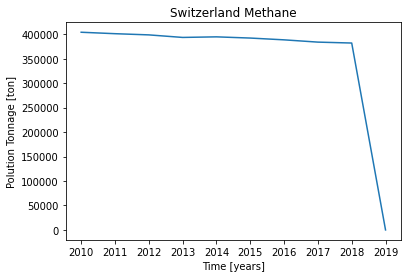

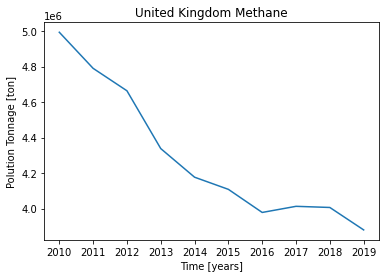

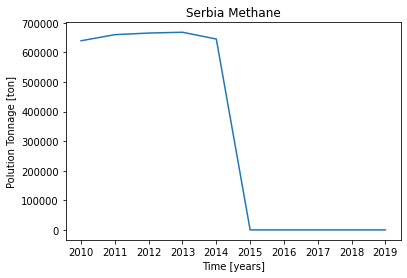

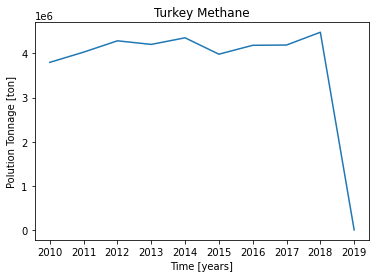

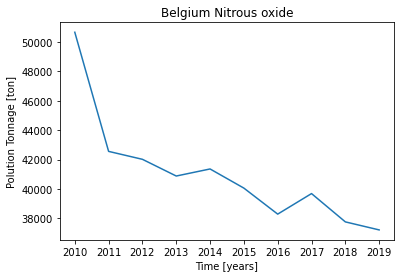

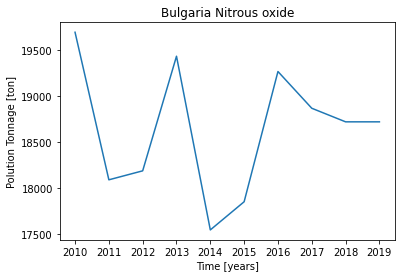

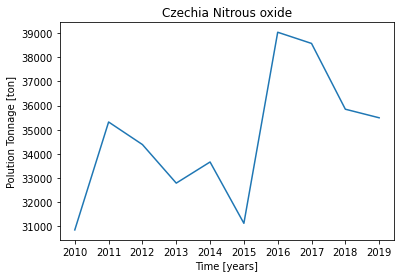

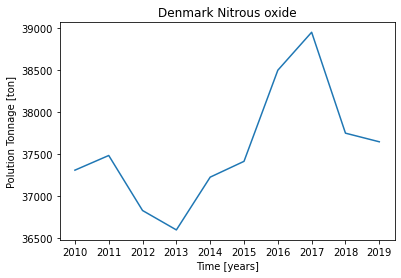

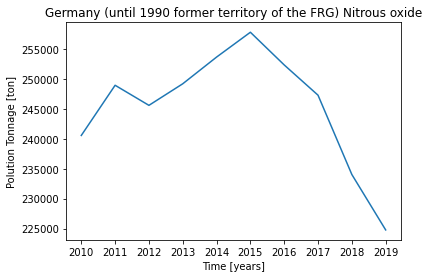

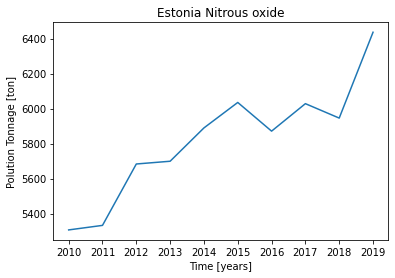

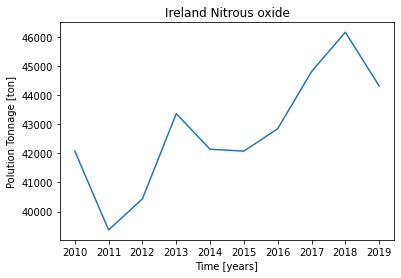

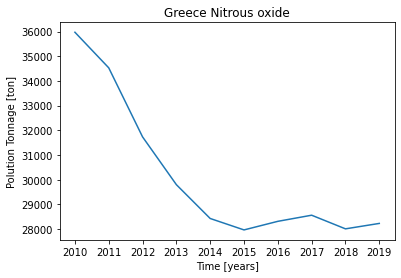

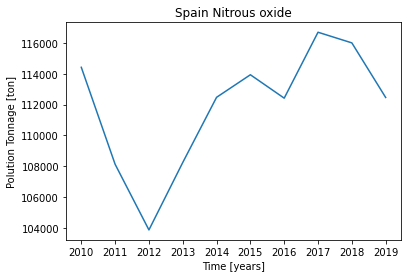

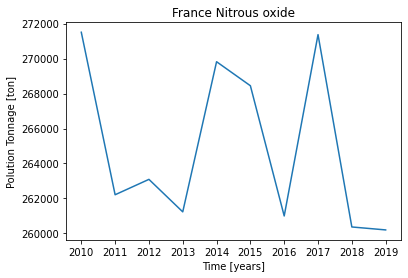

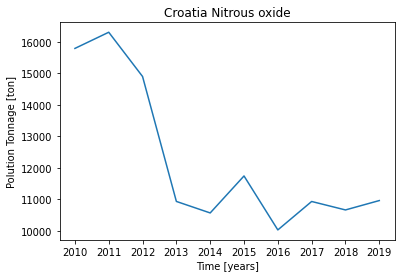

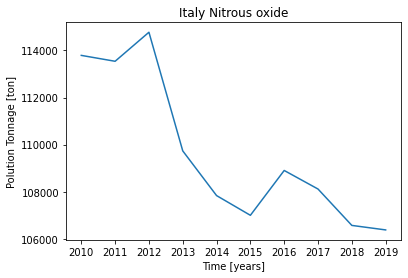

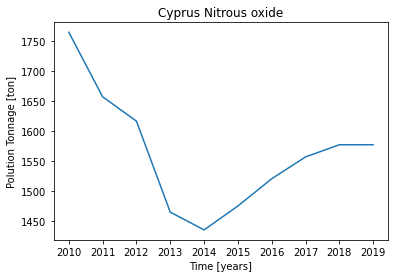

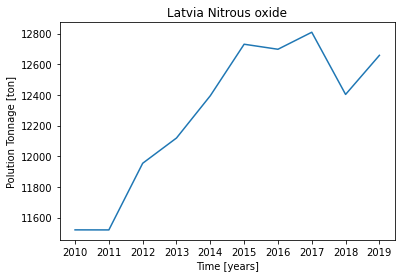

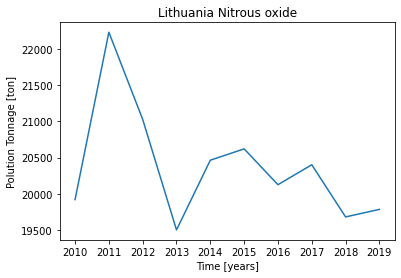

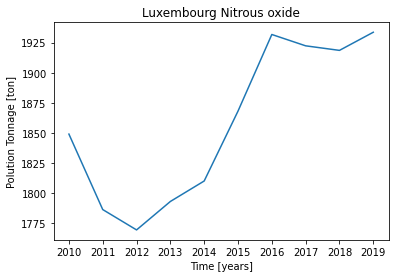

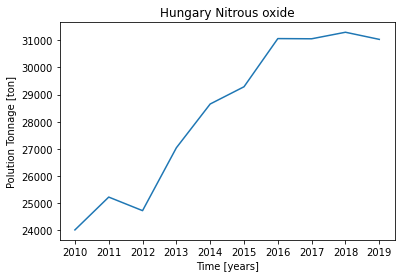

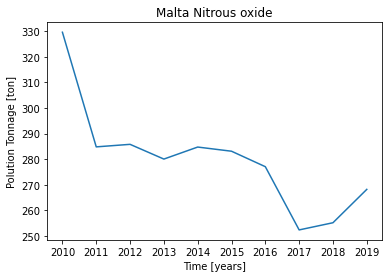

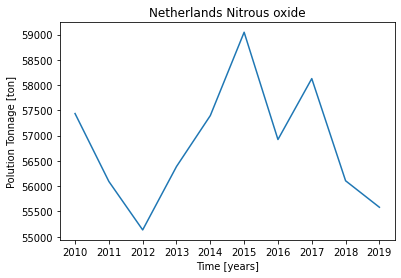

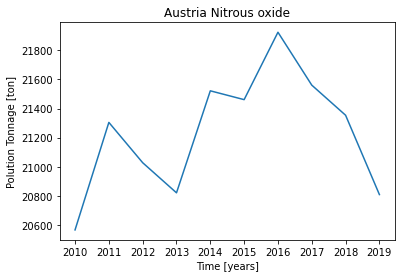

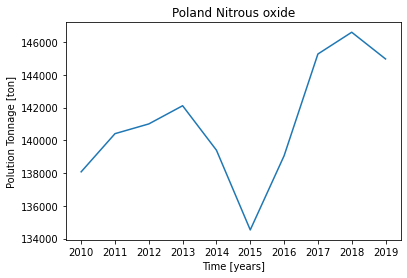

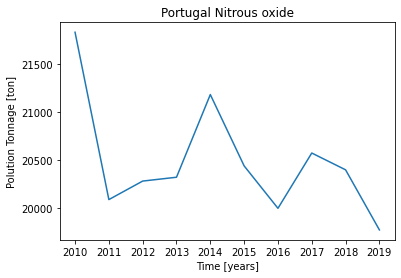

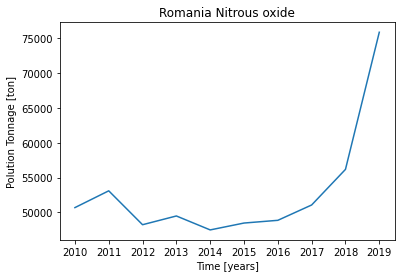

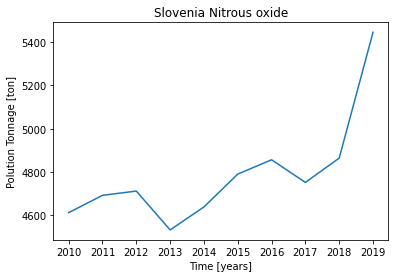

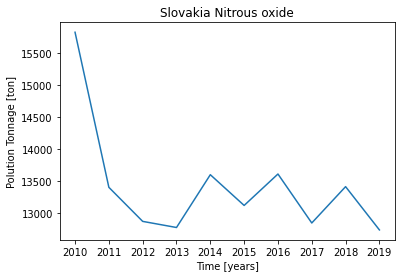

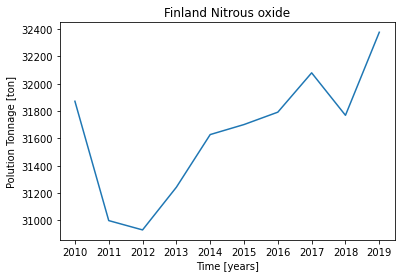

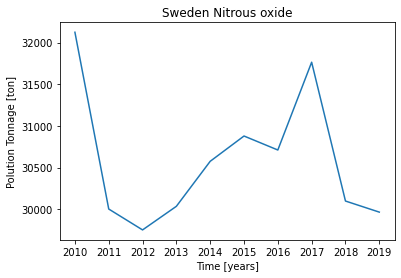

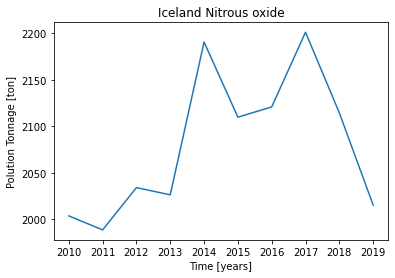

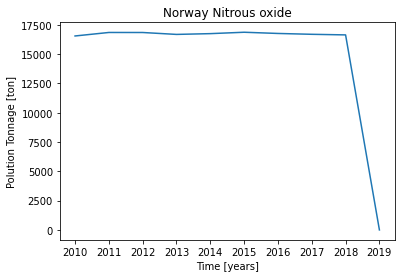

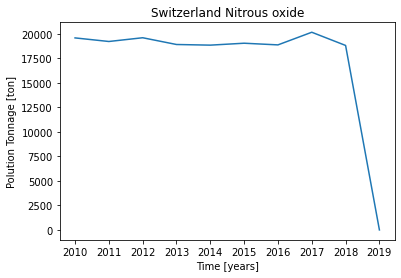

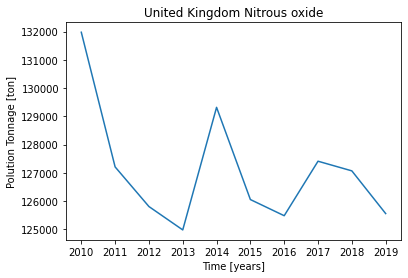

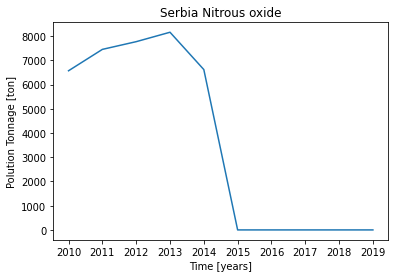

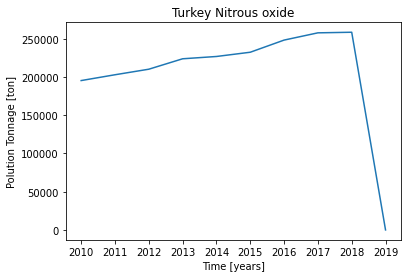

In [10]:
for air in df['AIRPOL'].unique():
    for geo in df['GEO'].unique():
        dfl = df.loc[(df['GEO']== geo) & (df['AIRPOL']== air)]
        plt.title(geo+' '+air)
        plt.xlabel('Time [years]')
        plt.ylabel('Polution Tonnage [ton]')
        plt.plot(dfl['TIME'], dfl['Value'])
        plt.show()

## Mortality

### Importing needed Data about Mortality from: https://ec.europa.eu/eurostat

In [15]:
m_df = pd.read_csv("/Users/patrykdabkowski/Desktop/LifeExpentancy/demo_mlexpec/demo_mlexpec_1_Data.csv" ,delimiter=",")
m_df = m_df[['GEO', 'TIME', 'SEX', 'Value']]
m_df

,GEO,TIME,SEX,Value
0,European Union - 27 countries (from 2020),2011,Total,80.1
1,European Union - 27 countries (from 2020),2011,Males,77.0
2,European Union - 27 countries (from 2020),2011,Females,83.1
3,European Union - 28 countries (2013-2020),2011,Total,80.2
4,European Union - 28 countries (2013-2020),2011,Males,77.3
...,...,...,...,...
1675,Azerbaijan,2020,Males,:
1676,Azerbaijan,2020,Females,:
1677,Georgia,2020,Total,:
1678,Georgia,2020,Males,:


### Searching for common coutries needed to analysis in our datasets. Removing common data and next removing not common data from dataframe

### We will use only data for SEX: Total velues

### Finaly we taking only data befor 2020 to keep compatibility with AirPolutions data

In [18]:
df_geo = list(df['GEO'])
m_df_geo = list(m_df['GEO'])
common = list(set(df_geo).intersection(m_df_geo))
for i in m_df_geo[:]:
      if i in common:
          m_df_geo.remove(i)
m_df_geo

for geo in m_df['GEO']:
    if geo in m_df_geo:
        m_df.drop(m_df.loc[m_df['GEO'] == geo ].index, inplace=True)
m_df.reset_index(inplace = True, drop = True)
m_df = m_df[m_df['SEX'] == 'Total']
m_df = m_df[m_df['TIME'] < 2020]
m_df

,GEO,TIME,SEX,Value
0,Belgium,2011,Total,80.7
1,Bulgaria,2011,Total,74.2
2,Czechia,2011,Total,78.0
3,Denmark,2011,Total,79.9
4,Germany (until 1990 former territory of the FRG),2011,Total,80.6
...,...,...,...,...
292,Norway,2019,Total,83.0
293,Switzerland,2019,Total,84.0
294,United Kingdom,2019,Total,:
295,Serbia,2019,Total,76.0
